<a href="https://colab.research.google.com/github/ayoublegue/Test/blob/main/TP_proba_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
from scipy.stats import skew


import scipy.stats
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
print(np.mean([1,2,3]))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2.0


# Import des données



In [ ]:
taille_h = np.loadtxt("/content/drive/MyDrive/AISD TP1/taille_h.txt")
taille_f = np.loadtxt("/content/drive/MyDrive/AISD TP1/taille_f.txt")

print(taille_h[:10]) 

[179.22388967 166.44582473 159.49299218 175.21111621 128.88987702
 173.38041799 201.00124217 205.15966489 142.91773955 178.01415395]


# Distribution empirique de la taille des hommes 

---



105.78800983153809 244.54463216076874


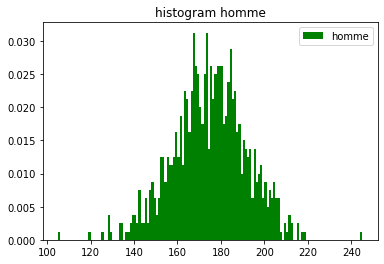

In [ ]:
max_h=np.max(taille_h)
min_h=np.min(taille_h)
print(min_h,max_h)
#bins=np.linspace(105,244,139)
bins = np.arange(int(min_h),int(max_h)+2)
#print(bins)
axes=bins
a = np.histogram(taille_h, bins = bins, range = [min_h,max_h] ,  density = True)


plt.hist(taille_h, bins = bins, range = [min_h,max_h], label ='homme', color="g", density = True) 
plt.title("histogram homme") 
plt.legend(prop={'size': 10})
plt.show()

# Distribution empirique de la taille des femmes

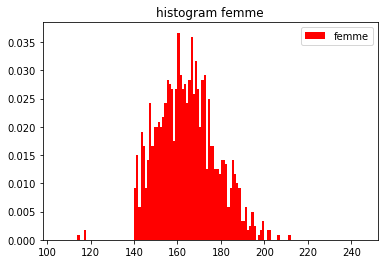

In [ ]:
max_f=np.max(taille_f)
min_f=np.min(taille_f)


b = np.histogram(taille_f, bins = bins, range = [min_h,max_h] ,  density = True)


plt.hist(taille_f, bins = bins, range = [min_h,max_h], label ='femme', color="r", density = True) 
plt.title("histogram femme") 
plt.legend(prop={'size': 10})
plt.show()

# Les variables X1 et X2 sont elles indépendantes?


Non, les varaibles X1 et X2 sont dépendantes

# Loi marginale empirique correspondant à la probabilité de la taille de tous les genres confondus

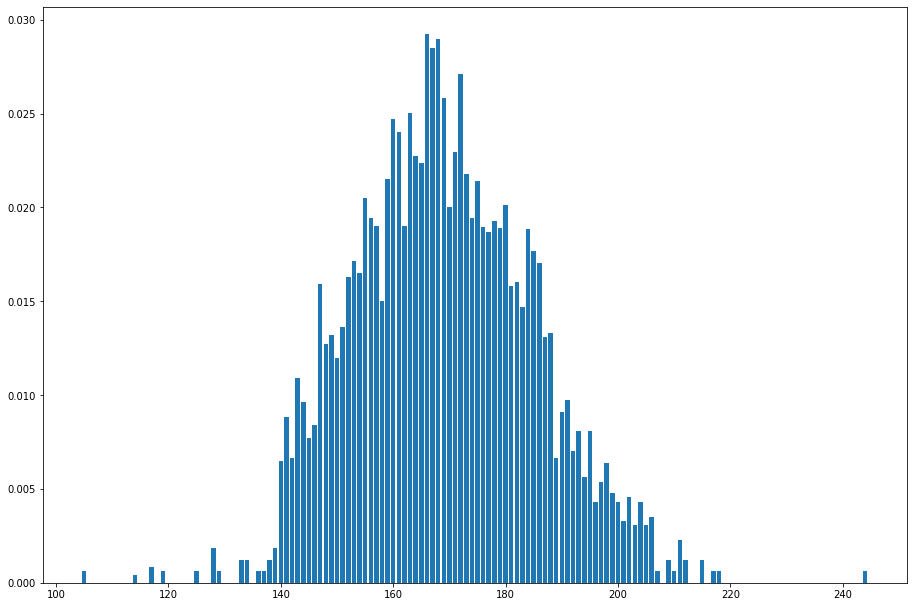

In [ ]:
tot=a[0]*0.495+b[0]*0.505#calcul  de la loi marginale empirique 
fig = plt.figure()
axe = fig.add_axes([0,0,2,2])
y = np.arange(int(min_h),int(min_h) + tot.size)

plt.bar(y,tot)#traçage de la loi marginale empirique
plt.show()




# Calcul de la taille la plus fréquente (mode) de la population humaine

In [ ]:
te=list(tot)

maxFreq=te.index(np.max(te))
print("taille plus fréquente :", y[maxFreq])


taille plus fréquente : 166


# Calcul de la taille moyenne de la population humaine


In [ ]:
# L'espérance = la somme des tailles pondèrées par leurs proba

moyenne = 0

for i in y:
  moyenne = moyenne + y[i- int(min_h)]*te[i-int(min_h)]

print("taille moyenne :" ,moyenne)



taille moyenne : 169.03156458333336


# Calcul de la taille médiane de la population humaine

In [ ]:
mediane = y[int(y.size/2)]
print("taille mediane:", mediane)

taille mediane: 175


On remarque que lorsqu'on mesure entre 1,8m et 1,85m on appartient plus aux hommes, et entre 1,6m et 1,65m on appartient plus aux femmes. 

# Calcul de l'ecart-type des tailles des hommes



In [ ]:
a1=a[0]
y1 = np.arange(int(min_h),int(min_h) + a1.size)

moy1= 0
moyq= 0
ecart1=0
a2=list(a1)

#Relation de la variance  V(X) = E(X²) - E(X)²

for i in y1:
    moy1 = moy1 + y1[i- int(min_h)]*a2[i-int(min_h)] #E(X)
    moyq = moyq + ((y1[i- int(min_h)])**2)*a2[i-int(min_h)] # E(X²)

#print(moyq-(moy1)**2)

ecart1= math.sqrt(moyq-(moy1)**2)

print("taille moyenne(l'ésperence) :" ,moy1)
print("taille moyenne E(X^2) :" ,moyq)
print("taille ecart type  :" ,ecart1)
#Methode 2 en utilisant la fonction vérification 
ecrthomme = np.std(taille_h)
print("ecart-type des hommes:",ecrthomme)

taille moyenne(l'ésperence) : 174.28124999999997
taille moyenne E(X^2) : 30655.446249999994
taille ecart type  : 16.777727749534634
ecart-type des hommes: 16.769954896845086


# Calcul de l'ecart-type des tailles des femmes

In [ ]:
b1=b[0]
y2 = np.arange(int(min_f),int(min_f) + b1.size)

moy2= 0
moyq2= 0
ecart2=0
b2=list(b1)

#Relation de la variance  V(X) = E(X²) - E(X)²

for i in y2:
    moy2 = moy2 + y2[i- int(min_f)]*b2[i-int(min_f)] #E(X)
    moyq2 = moyq2 + ((y2[i- int(min_f)])**2)*b2[i-int(min_f)] # E(X²)

#print(moyq2-(moy2)**2)

ecart2= math.sqrt(moyq2-(moy2)**2)

print("taille moyenne(l'ésperence) :" ,moy2)
print("taille moyenne E(X^2) :" ,moyq2)
print("taille ecart type  :" ,ecart2)
#Methode 2 en utilisant la fonction 
ecrtfemme = np.std(taille_f)
print("ecart-type des femmes:",ecrtfemme)

taille moyenne(l'ésperence) : 172.8858333333333
taille moyenne E(X^2) : 30067.83583333333
taille ecart type  : 13.353818404195602
ecart-type des femmes: 13.355477407552247


# Moment centré d'orde 3 pour les hommes (skew)

In [ ]:
# skew = E[((X-E(X))/ecartype)^3]
skewHomme = 0
for i in y1:
  X = y1[i- int(min_h)] # X
  P = a2[i - int(min_h)]
  xskew= ((X-moy1)/ecart1)**3 
  skewHomme = skewHomme + xskew*P

print(skewHomme)

#methode 2 en utilisant la fonction 
k= st.skew(taille_h)
print(k)


-0.14083598511212128
-0.1376460843730888


# Moment centré d'ordre 3 pour les femmes

In [ ]:
# skew = E[((X-E(X))/ecartype)^3]
skewFemme = 0
for i in y2:
  X2 = y2[i- int(min_f)] # X
  P2 = b2[i - int(min_f)]
  xskew2= ((X2-moy2)/ecart2)**3 
  skewFemme = skewFemme + xskew2*P2

print(skewFemme)

#methode 2 en utilisant la fonction 
k2= st.skew(taille_f)
print(k2)

0.2512368460803446
0.2564036166514807


In [ ]:
print(scipy.stats.norm.pdf(6,2.0,1.0))


0.00013383022576488537


# Calcul de NLL


In [ ]:
def NLLGAUSSIENNE(sigma, mu):
  DLLGAUSS = 0

  for i in y1:
    fdll = np.log(scipy.stats.norm.pdf(i,mu,sigma)).sum()

  return -fdll

In [ ]:
listSigma = np.arange(10,40.2,0.2)
listMu = np.arange(140,221)

tab = []

for m in listMu:
  for s in listSigma:
    tab.append(NLLGAUSSIENNE(s,m))
print(tab)
print(np.size(tab))


[57.30152362619872, 55.221333942845156, 53.26074433935202, 51.4108000102928, 49.663368069255306, 48.01104868203612, 46.44709720946494, 44.965355828278895, 43.560193334051874, 42.22645202618165, 40.959400738548275, 39.75469321646772, 38.60833115565961, 37.51663131592002, 36.476196204130304, 35.48388789066627, 34.53680458226445, 33.632259624657024, 32.767762651206255, 31.941002630513868, 31.14983259751386, 30.392255879680622, 29.66641365336693, 28.97057368548817, 28.303120133258947, 27.662544289862492, 27.04743617712344, 26.45647689774322, 25.88843166968244, 25.342143474038803, 24.81652725544451, 24.31056462074104, 23.823298987606567, 23.35383114002026, 22.901315152040244, 22.46495464542703, 22.043999350231275, 21.63774194064069, 21.245515121199244, 20.866688941014065, 20.500668315792243, 20.14689073953237, 19.804824169464275, 19.47396506941006, 19.153836598151535, 18.84398693065371, 18.543987701127346, 18.25343255793061, 17.971935821223784, 17.69913123511294, 17.43467080675871, 17.17822

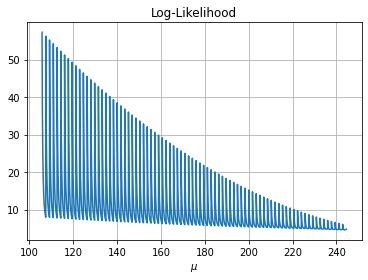

In [ ]:
x = np.linspace(min_h, max_h,12231, endpoint=True)
plt.plot(x,tab)

plt.title(r'Log-Likelihood')
plt.xlabel(r'$\mu$')

plt.grid()

plt.savefig("likelihood_normal_distribution_02.png", bbox_inches='tight')
#plt.show()

In [ ]:
#  loi gaussienne => p(x) = (1/(sigma*sqrt(2pi)))*exp(-(x-mu)**2/(2*sigma²))

# L(Homme) = produit des f(xi) pour i allant de 1 à taille_homme.size

def NLLGAUSSIENNE(sigma, mu):
  DLLGAUSS = 0
 
  for i in y1:
    fdll = np.log(scipy.stats.norm.pdf(i,mu,sigma))
    DLLGAUSS = DLLGAUSS + fdll
    #fGauss = (1/(sigma*math.sqrt(2*pi)))*math.exp(-((i-mu)**2)/(2*(sigma**2)))
    #vraisemblance = vraisemblance*fGauss

  return -DLLGAUSS

In [ ]:
listSigma = np.arange(10,15.2,0.2)
listMu = np.arange(140,146)

tab = []

for m in listMu:
  for s in listSigma:
    tabinsert .append(NLLGAUSSIENNE(s,m))


  print(tab)
  
    


[2427.4633076678197, 2353.487713167104, 2283.8433347282153, 2218.2044186713224, 2156.275164812339, 2097.7864849065436, 2042.4931628965167, 1990.1713610498402, 1940.6164246745107, 1893.6409452569228, 1849.0730478411967, 1806.7548734712905, 1766.541231719502, 1728.298401865483, 1691.9030642813595, 1657.2413461133895, 1624.2079675041618, 1592.7054764339332, 1562.6435618263085, 1533.9384359047858, 1506.5122779376495, 1480.2927324986654, 1455.2124562244512, 1431.2087077866902, 1408.2229764356478, 1386.200645025188]
[2427.4633076678197, 2353.487713167104, 2283.8433347282153, 2218.2044186713224, 2156.275164812339, 2097.7864849065436, 2042.4931628965167, 1990.1713610498402, 1940.6164246745107, 1893.6409452569228, 1849.0730478411967, 1806.7548734712905, 1766.541231719502, 1728.298401865483, 1691.9030642813595, 1657.2413461133895, 1624.2079675041618, 1592.7054764339332, 1562.6435618263085, 1533.9384359047858, 1506.5122779376495, 1480.2927324986654, 1455.2124562244512, 1431.2087077866902, 1408.22

In [ ]:

mu = 3.0
sigma = 0.5

data = np.random.randn(100000) * sigma + mu
hx, hy, _ = plt.hist(te, bins=50,color="lightblue")

plt.ylim(0.0,max(hx)+0.05)
plt.title(r'Normal distribution $\mu_0 = 3$ and $\sigma_0 = 0.5$')
plt.grid()

plt.savefig("likelihood_normal_distribution_01.png", bbox_inches='tight')
#plt.show()
plt.close()

In [ ]:
scipy.stats.norm.pdf(6,2.0,1.0)

print(-np.log(scipy.stats.norm.pdf(te,2.0,1.0)).sum() )

x = np.linspace(-10, 10, 1000, endpoint=True)

y = []
for i in x:
    y.append(np.log(scipy.stats.norm.pdf(te,i,0.5)).sum())

plt.plot(x,y)

plt.title(r'Log-Likelihood')
plt.xlabel(r'$\mu$')

plt.grid()

plt.savefig("likelihood_normal_distribution_02.png", bbox_inches='tight')
#plt.show()

# Affichage de numpy array de NLL


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
#print(np.arange(140,221))

mu = np.arange(140,221)


sigma =np.arange(10,40+0.2,0.2)

print("sigma est :",sigma)

t_s=np.size(sigma)

print("taille de sigma est",t_s)

print(" mu est :",mu)

t_u=np.size(mu)

print("taille de mu est " ,t_u)


#tab_2d=np.array([[np.arange(140,221)], [np.arange(10,40.2,0.2)]])

#print(tab_2d)




In [ ]:

np.random.randn(1) * sigma[149] + mu[80]

In [ ]:

data=[]

for i in sigma:

  if(i<81):
    data.append(np.random.randn(1) * sigma[i] + mu)
 
  else :
    data[i]=int(np.random.randn([min_h,max_h]) * sigma[i])

#a = np.histogram(taille_h, bins = bins, range = [min_h,max_h] ,  density = True)
bins = np.arange(int(min_h),int(max_h)+2)
hx, hy, _= plt.hist(data, bins=bins,color="lightblue")

plt.ylim(0.0,max(hx)+0.05)
plt.title(r'Normal distribution $\mu_0 = 3$ and $\sigma_0 = 0.5$')
plt.grid()

plt.savefig("likelihood_normal_distribution_01.png", bbox_inches='tight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

mu = 3.0
sigma = 0.5

data = np.random.randn(100000) * sigma + mu
#2 -- Plot donnée
hx, hy, _ = plt.hist(data, bins=50, normed=1,color="lightblue")

plt.ylim(0.0,max(hx)+0.05)
plt.title(r'Normal distribution $\mu_0 = 3$ and $\sigma_0 = 0.5$')
plt.grid()

plt.savefig("likelihood_normal_distribution_01.png", bbox_inches='tight')
#plt.show()

In [ ]:
plt.close()
scipy.stats.norm.pdf(data,2.0,1.0)

print( -np.log(scipy.stats.norm.pdf(data,2.0,1.0)).sum() )

x = np.linspace(-10, 10, 1000, endpoint=True)

y = []
for i in x:
    y.append(np.log(scipy.stats.norm.pdf(data,i,0.5)).sum())

plt.plot(x,y)

plt.title(r'Log-Likelihood')
plt.xlabel(r'$\mu$')

plt.grid()

plt.savefig("likelihood_normal_distribution_02.png", bbox_inches='tight')
#plt.show()